### Step2-1

In [14]:
from hashbacket import *
from pprint import pprint
import os

def update_info(update_stats):
    print("\n更新分析:")
    print(f"Number of deleted keys: {update_stats['changes']['keys_removed']}")
    print(f"Number of deleted elements: {update_stats['changes']['items_removed']}")
    print(f"Number of remaining keys: {update_stats['after']['total_keys']}")    

if __name__ == "__main__":
    #ZXW_MODIFY
    # input_file = "token_info_v2_vqa_5500k_s16k.txt"
    input_file = "token_info_captions.txt"
    bins_boxs = []
    if not os.path.exists(input_file):
        print(f"File {input_file} does not exist！")
        assert input_file, f"File {input_file} does not exist！"
    else:
        processor = HashBucketProcessor(input_file)
        processor.build_buckets()
        processor.summary()
        # processor.print_example(8192)

        # capacity = 16384
        capacity = 8192    #ZXW_MODIFY
        processor.find_items(capacity)  # 寻找 capacity//2 的key
        processor.summary()
    print("====================="*8)    
    initial_summary = processor.get_hash_buckets_summary()
    print("-------------------- initial_summary ----------------------")
    pprint(initial_summary)

    # build tracker
    tracker = PackingTracker(processor)
    # Round 1,  process samples with a token count of {2^n | n ∈ [0, N]\}
    bin_boxs_001 = tracker.track_packing('pack_with_deletion', box_capacity=8192)
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)

    # Round 2, packing with seeds big than `custom_hal=4096`
    bin_boxs_002 = tracker.track_packing('pack_with_flexible_seeds',
                                        box_capacity=8192,
                                        seed_strategy="custom_half",
                                        seed_params={"half": 4096},  
                                        min_items=5,
                                        min_ratio=0.95,
                                        max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)

    # Round 3, packing with seeds big than `custom_hal=7000`.
        # Note, in round 2, some big items are left because min_items=5. We fixed it with min_items=1.
    bin_boxs_003 = tracker.track_packing('pack_with_flexible_seeds',
                                        box_capacity=8192,
                                        seed_strategy="custom_half",
                                        seed_params={"half": 7000},  
                                        min_items=1,
                                        min_ratio=0.94,
                                        max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)

    # Round 4, packing with seeds, key > `custom_hal=2000`.
    bin_boxs_004 = tracker.track_packing('pack_with_flexible_seeds',
                                        box_capacity=8192,
                                        seed_strategy="custom_half",
                                        seed_params={"half": 2000},  
                                        min_items=4,
                                        min_ratio=0.94,
                                        max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)

    # Round 5, packing with seeds, top n keys
    bin_boxs_005 = tracker.track_packing('pack_with_flexible_seeds',
                                        box_capacity=8192,
                                        seed_strategy="top_n",
                                        seed_params={"n": 60}, # 1 for 16384  
                                        min_items=6,
                                        min_ratio=0.92,
                                        max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)

    # Round 6, packing with seeds, top n keys
    bin_boxs_006 = tracker.track_packing('pack_with_flexible_seeds',
                                        box_capacity=8192,
                                        seed_strategy="top_n",
                                        seed_params={"n": 50}, # 1 for 16384  
                                        min_items=6,
                                        min_ratio=0.92,
                                        max_workers = os.cpu_count(),
                                        )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)
    

    all_rems=[(k,len(processor.hash_buckets[k])) for k in processor.hash_buckets]
    x_values = [item[0] for item in all_rems]
    y_values = [item[1] for item in all_rems]
    bin_boxs_007 = tracker.track_packing('pack_simplest_strategy',
                                             box_capacity=8192,
                                             keys= x_values,
                                             m = sum(y_values)//50,  
                                             min_ratio=0.92,
                                             max_workers = os.cpu_count(),
                                            )
    update_stats = processor.update_hash_buckets(remove_empty=True, verbose=True)
    update_info(update_stats)


2025-09-29 17:48:35,219 - INFO - 开始处理文件，总行数: 299980
构建哈希桶: 100%|██████████████████████████████████████████████████████████████████████████| 299980/299980 [00:02<00:00, 108709.82行/s]
2025-09-29 17:48:37,999 - INFO - 找到 10 个有效的桶键
2025-09-29 17:48:38,147 - INFO - 当前箱子没有满: 8184
2025-09-29 17:48:38,153 - INFO - 当前箱子元素: [(0, 8, 'k12_k12_6591'), (0, 16, 'k12_k12_109024'), (0, 32, 'k12_k12_108057'), (0, 64, 'k12_k12_127776'), (0, 128, 'mmc-caption_mmc-caption_215440'), (0, 256, 'mmc-caption_mmc-caption_231921'), (0, 512, 'mmc-caption_mmc-caption_249228'), (0, 1024, 'mmc-caption_mmc-caption_17919'), (0, 2048, 'allava-caption-part1_allava-caption-part1_94401'), (0, 8, 'k12_k12_90539'), (0, 16, 'k12_k12_109347'), (0, 32, 'k12_k12_108667'), (0, 64, 'k12_k12_129531'), (0, 128, 'mmc-caption_mmc-caption_218983'), (0, 256, 'mmc-caption_mmc-caption_233126'), (0, 512, 'mmc-caption_mmc-caption_295176'), (0, 1024, 'mmc-caption_mmc-caption_19964'), (0, 2048, 'allava-caption-zh-part2_allava-caption-zh-part2

=== 哈希桶处理摘要 ===
哈希桶数量: 5860
总数据项: 299980
内存占用: 0.07 GB
有效桶键: [0, []]
处理行数: 299980
=== 哈希桶处理摘要 ===
哈希桶数量: 5860
总数据项: 299980
内存占用: 0.07 GB
有效桶键: [10, [4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8]]
处理行数: 299980
-------------------- initial_summary ----------------------
{'basic': {'empty_keys': 0,
           'non_empty_keys': 5860,
           'total_items': 299980,
           'total_keys': 5860},
 'items_by_size': {'large': 0, 'medium': 32706, 'small': 267274},
 'memory_usage': 78442160,
 'size_distribution': {'large': 0, 'medium': 3820, 'small': 2040}}
save checkpoint........
当前哈希桶状态:
  📦 总元素数: 299980
  🔑 总key数: 5860
  📊 分布情况:
    small: 267274 个元素
    medium: 32706 个元素
剩余的key及其元素数量：(keys, nums):([2048, 1024, 512, 256, 128, 64, 32, 16, 8],[34, 241, 136, 122, 69, 148, 730, 414, 3])
num of left_elems:[34, 241, 136, 122, 69, 148, 730, 414, 3]


2025-09-29 17:48:38,231 - INFO - 清理空key: 删除了 7 个空key
2025-09-29 17:48:38,232 - INFO - 哈希桶更新完成:
2025-09-29 17:48:38,233 - INFO -   📊 Key数量: 5860 → 5853
2025-09-29 17:48:38,233 - INFO -   📦 元素总数: 298155 → 298155
2025-09-29 17:48:38,233 - INFO -   🗑️  删除空key: 7


剩余的key及其元素数量：(keys, nums):([1024, 32, 8],[3, 117, 3])
num of left_elems:[3, 117, 3]
当前哈希桶状态:
  📦 总元素数: 298155
  🔑 总key数: 5853
  📊 分布情况:
    small: 265489 个元素
    medium: 32666 个元素

更新分析:
Number of deleted keys: 7
Number of deleted elements: 0
Number of remaining keys: 5853
save checkpoint........
当前哈希桶状态:
  📦 总元素数: 298155
  🔑 总key数: 5853
  📊 分布情况:
    small: 265489 个元素
    medium: 32666 个元素


2025-09-29 17:48:38,461 - INFO - 种子策略: custom_half
2025-09-29 17:48:38,462 - INFO - 策略参数: {'half': 4096}
2025-09-29 17:48:38,462 - INFO -   🌱 种子keys(max): 7957
2025-09-29 17:48:38,462 - INFO -   🔧 填充keys数量: 3998
2025-09-29 17:48:40,457 - INFO - 种子筛选完成:
2025-09-29 17:48:40,458 - INFO -   📊 总种子数: 10152
2025-09-29 17:48:40,463 - INFO -   🎯 筛选后: 10152
2025-09-29 17:48:40,465 - INFO -   🚀 筛选率: 100.0%
2025-09-29 17:48:40,465 - INFO -   🔧 线程数: 128
2025-09-29 17:48:40,466 - INFO -   📦 约束: 容量≥95%, 物品≥5个
2025-09-29 17:48:40,468 - INFO - 初始资源状态:
2025-09-29 17:48:40,468 - INFO -   🗂️ 小元素总数: 288003
2025-09-29 17:48:40,469 - INFO -   🔑 可用小key种类: 3998
多约束装箱(成功:10093, 成功率:99.8%, 剩余:234365): 100%|██████████████████████████████████████| 10152/10152 [01:21<00:00, 124.10seed/s]seed/s]
2025-09-29 17:50:03,576 - INFO - 🎉 多约束装箱完成!
2025-09-29 17:50:03,577 - INFO - 📊 执行统计:
2025-09-29 17:50:03,577 - INFO -   ⏱️  总耗时: 83.10秒
2025-09-29 17:50:03,578 - INFO -   🎯 处理种子: 10152
2025-09-29 17:50:03,578 - INFO -   📦 成功

当前哈希桶状态:
  📦 总元素数: 234332
  🔑 总key数: 2838
  📊 分布情况:
    small: 220089 个元素
    medium: 14243 个元素

更新分析:
Number of deleted keys: 3015
Number of deleted elements: 0
Number of remaining keys: 2838
save checkpoint........
当前哈希桶状态:
  📦 总元素数: 234332
  🔑 总key数: 2838
  📊 分布情况:
    small: 220089 个元素
    medium: 14243 个元素


多约束装箱: 100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 95566.42seed/s]
2025-09-29 17:50:03,749 - INFO - 🎉 多约束装箱完成!
2025-09-29 17:50:03,749 - INFO - 📊 执行统计:
2025-09-29 17:50:03,749 - INFO -   ⏱️  总耗时: 0.01秒
2025-09-29 17:50:03,750 - INFO -   🎯 处理种子: 18
2025-09-29 17:50:03,750 - INFO -   📦 成功箱子: 18
2025-09-29 17:50:03,750 - INFO -   📈 总成功率: 100.00%
2025-09-29 17:50:03,751 - INFO - 📦 装箱质量:
2025-09-29 17:50:03,751 - INFO -   📊 平均装载率: 99.8%
2025-09-29 17:50:03,751 - INFO -   🔢 平均物品数: 1.9
2025-09-29 17:50:03,752 - INFO -   📉 物品数范围: 1-2
2025-09-29 17:50:03,752 - INFO -   💾 总打包物品: 35
2025-09-29 17:50:03,752 - INFO - 🔗 剩余资源:
2025-09-29 17:50:03,753 - INFO -   🗂️ 小元素: 234297
2025-09-29 17:50:03,753 - INFO -   🔑 可用key类型: 2820
2025-09-29 17:50:03,763 - INFO - 清理空key: 删除了 18 个空key
2025-09-29 17:50:03,764 - INFO - 哈希桶更新完成:
2025-09-29 17:50:03,764 - INFO -   📊 Key数量: 2838 → 2820
2025-09-29 17:50:03,764 - INFO -   📦 元素总数: 234297 → 234297
2025

当前哈希桶状态:
  📦 总元素数: 234297
  🔑 总key数: 2820
  📊 分布情况:
    small: 220072 个元素
    medium: 14225 个元素

更新分析:
Number of deleted keys: 18
Number of deleted elements: 0
Number of remaining keys: 2820
save checkpoint........
当前哈希桶状态:
  📦 总元素数: 234297
  🔑 总key数: 2820
  📊 分布情况:
    small: 220072 个元素
    medium: 14225 个元素


2025-09-29 17:50:04,350 - INFO - 种子筛选完成:
2025-09-29 17:50:04,352 - INFO -   📊 总种子数: 16313
2025-09-29 17:50:04,352 - INFO -   🎯 筛选后: 16313
2025-09-29 17:50:04,352 - INFO -   🚀 筛选率: 100.0%
2025-09-29 17:50:04,353 - INFO -   🔧 线程数: 128
2025-09-29 17:50:04,353 - INFO -   📦 约束: 容量≥94%, 物品≥4个
2025-09-29 17:50:04,354 - INFO - 初始资源状态:
2025-09-29 17:50:04,355 - INFO -   🗂️ 小元素总数: 217984
2025-09-29 17:50:04,355 - INFO -   🔑 可用小key种类: 1758
多约束装箱(成功:16305, 成功率:100.0%, 剩余:121163): 100%|█████████████████████████████████████| 16313/16313 [00:37<00:00, 433.28seed/s]seed/s]
2025-09-29 17:50:43,720 - INFO - 🎉 多约束装箱完成!
2025-09-29 17:50:43,720 - INFO - 📊 执行统计:
2025-09-29 17:50:43,720 - INFO -   ⏱️  总耗时: 39.36秒
2025-09-29 17:50:43,721 - INFO -   🎯 处理种子: 16313
2025-09-29 17:50:43,721 - INFO -   📦 成功箱子: 16313
2025-09-29 17:50:43,721 - INFO -   📈 总成功率: 100.00%
2025-09-29 17:50:43,721 - INFO - 📦 装箱质量:
2025-09-29 17:50:43,721 - INFO -   📊 平均装载率: 100.0%
2025-09-29 17:50:43,722 - INFO -   🔢 平均物品数: 6.9
2025-09-29 

当前哈希桶状态:
  📦 总元素数: 121159
  🔑 总key数: 812
  📊 分布情况:
    small: 121159 个元素
    medium: 0 个元素

更新分析:
Number of deleted keys: 2008
Number of deleted elements: 0
Number of remaining keys: 812
save checkpoint........
当前哈希桶状态:
  📦 总元素数: 121159
  🔑 总key数: 812
  📊 分布情况:
    small: 121159 个元素


多约束装箱(成功:7049, 成功率:99.2%, 剩余:64414): 100%|██████████████████████████████████████████| 7187/7187 [00:10<00:00, 704.13seed/s]seed/s]
2025-09-29 17:50:55,706 - INFO - 🎉 多约束装箱完成!
2025-09-29 17:50:55,706 - INFO - 📊 执行统计:
2025-09-29 17:50:55,706 - INFO -   ⏱️  总耗时: 11.87秒
2025-09-29 17:50:55,707 - INFO -   🎯 处理种子: 7187
2025-09-29 17:50:55,707 - INFO -   📦 成功箱子: 7078
2025-09-29 17:50:55,707 - INFO -   📈 总成功率: 98.48%
2025-09-29 17:50:55,707 - INFO - 📦 装箱质量:
2025-09-29 17:50:55,707 - INFO -   📊 平均装载率: 99.2%
2025-09-29 17:50:55,708 - INFO -   🔢 平均物品数: 8.0
2025-09-29 17:50:55,708 - INFO -   📉 物品数范围: 8-8
2025-09-29 17:50:55,708 - INFO -   💾 总打包物品: 56624
2025-09-29 17:50:55,709 - INFO - 🔗 剩余资源:
2025-09-29 17:50:55,709 - INFO -   🗂️ 小元素: 64426
2025-09-29 17:50:55,709 - INFO -   🔑 可用key类型: 475
2025-09-29 17:50:55,709 - INFO - ❌ 失败分析:
2025-09-29 17:50:55,710 - INFO -      装载率不足: 109次 (1.5%)
2025-09-29 17:50:55,734 - INFO - 清理空key: 删除了 334 个空key
2025-09-29 17:50:55,735 - INFO - 哈希桶更新完成:
2025-09-29 17:5

当前哈希桶状态:
  📦 总元素数: 64535
  🔑 总key数: 478
  📊 分布情况:
    small: 64535 个元素

更新分析:
Number of deleted keys: 334
Number of deleted elements: 0
Number of remaining keys: 478
save checkpoint........
当前哈希桶状态:
  📦 总元素数: 64535
  🔑 总key数: 478
  📊 分布情况:
    small: 64535 个元素


多约束装箱(成功:987, 成功率:17.6%, 剩余:51817): 100%|███████████████████████████████████████████| 5652/5652 [00:11<00:00, 477.04seed/s]seed/s]
2025-09-29 17:51:08,087 - INFO - 🎉 多约束装箱完成!
2025-09-29 17:51:08,087 - INFO - 📊 执行统计:
2025-09-29 17:51:08,087 - INFO -   ⏱️  总耗时: 12.33秒
2025-09-29 17:51:08,088 - INFO -   🎯 处理种子: 5652
2025-09-29 17:51:08,088 - INFO -   📦 成功箱子: 992
2025-09-29 17:51:08,088 - INFO -   📈 总成功率: 17.55%
2025-09-29 17:51:08,088 - INFO - 📦 装箱质量:
2025-09-29 17:51:08,088 - INFO -   📊 平均装载率: 100.0%
2025-09-29 17:51:08,089 - INFO -   🔢 平均物品数: 8.0
2025-09-29 17:51:08,089 - INFO -   📉 物品数范围: 8-8
2025-09-29 17:51:08,089 - INFO -   💾 总打包物品: 7936
2025-09-29 17:51:08,089 - INFO - 🔗 剩余资源:
2025-09-29 17:51:08,089 - INFO -   🗂️ 小元素: 51939
2025-09-29 17:51:08,090 - INFO -   🔑 可用key类型: 389
2025-09-29 17:51:08,090 - INFO - ❌ 失败分析:
2025-09-29 17:51:08,091 - INFO -      装载率不足: 4660次 (82.4%)
2025-09-29 17:51:08,105 - INFO - 清理空key: 删除了 46 个空key
2025-09-29 17:51:08,106 - INFO - 哈希桶更新完成:
2025-09-29 17:5

当前哈希桶状态:
  📦 总元素数: 56599
  🔑 总key数: 432
  📊 分布情况:
    small: 56599 个元素

更新分析:
Number of deleted keys: 46
Number of deleted elements: 0
Number of remaining keys: 432
save checkpoint........
当前哈希桶状态:
  📦 总元素数: 56599
  🔑 总key数: 432
  📊 分布情况:
    small: 56599 个元素


2025-09-29 17:51:48,315 - INFO - pack_simplest_strategy 完成：多线程任务 56599，成功 8112，兜底输出 0 箱
2025-09-29 17:51:48,375 - INFO - 清理空key: 删除了 0 个空key
2025-09-29 17:51:48,375 - INFO - 哈希桶更新完成:
2025-09-29 17:51:48,376 - INFO -   📊 Key数量: 0 → 0
2025-09-29 17:51:48,376 - INFO -   📦 元素总数: 0 → 0
2025-09-29 17:51:48,376 - INFO -   🗑️  删除空key: 0


当前哈希桶状态:
  📦 总元素数: 0
  🔑 总key数: 0
  📊 分布情况:

更新分析:
Number of deleted keys: 0
Number of deleted elements: 0
Number of remaining keys: 0


In [15]:
bins_boxs.extend(bin_boxs_001)
bins_boxs.extend(bin_boxs_002)
bins_boxs.extend(bin_boxs_003)
bins_boxs.extend(bin_boxs_004)
bins_boxs.extend(bin_boxs_005)
bins_boxs.extend(bin_boxs_006)
bins_boxs.extend(bin_boxs_007)

In [17]:
save_bin_boxes(bins_boxs, "./s2_ckpt/bins_boxs_emova_captions_8k.pkl")

已保存装箱结果到 ./s2_ckpt/bins_boxs_emova_captions_8k.pkl


In [19]:
tracker.print_summary() 


=== 装箱操作历史 ===

操作 1: pack_with_deletion
参数: {'box_capacity': 8192}
装箱数: 59
使用元素: 1825
成功率: 100.0% (59/59)

操作 2: pack_with_flexible_seeds
参数: {'box_capacity': 8192, 'seed_strategy': 'custom_half', 'seed_params': {'half': 4096}, 'min_items': 5, 'min_ratio': 0.95, 'max_workers': 128}
装箱数: 10133
使用元素: 63823
成功率: 100.0% (10133/10133)

操作 3: pack_with_flexible_seeds
参数: {'box_capacity': 8192, 'seed_strategy': 'custom_half', 'seed_params': {'half': 7000}, 'min_items': 1, 'min_ratio': 0.94, 'max_workers': 128}
装箱数: 18
使用元素: 35
成功率: 100.0% (18/18)

操作 4: pack_with_flexible_seeds
参数: {'box_capacity': 8192, 'seed_strategy': 'custom_half', 'seed_params': {'half': 2000}, 'min_items': 4, 'min_ratio': 0.94, 'max_workers': 128}
装箱数: 16313
使用元素: 113138
成功率: 100.0% (16313/16313)

操作 5: pack_with_flexible_seeds
参数: {'box_capacity': 8192, 'seed_strategy': 'top_n', 'seed_params': {'n': 60}, 'min_items': 6, 'min_ratio': 0.92, 'max_workers': 128}
装箱数: 7078
使用元素: 56624
成功率: 100.0% (7078/7078)

操作 6: pack_w

### hash_buckets‘s element distribution

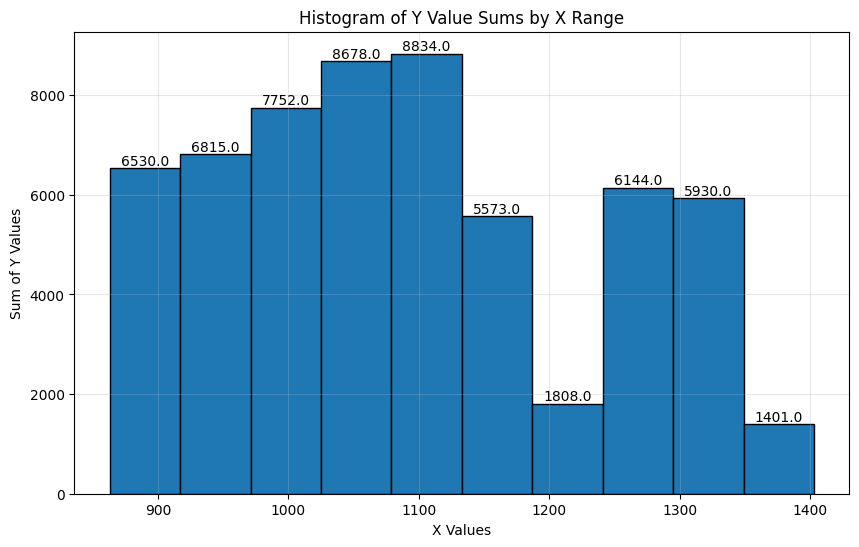

In [2]:
import matplotlib.pyplot as plt
import numpy as np

all_rems=[(k,len(processor.hash_buckets[k])) for k in processor.hash_buckets]
import matplotlib.pyplot as plt

# Assuming allrems is a list of lists where each sublist contains [x, y]
# Extract x and y values
x_values = [item[0] for item in all_rems]
y_values = [item[1] for item in all_rems]

# Define the number of bins
num_bins = 10

# Create bins based on x values
bins = np.linspace(min(x_values), max(x_values), num_bins + 1)

# Calculate sum of y values for each bin
bin_indices = np.digitize(x_values, bins) - 1
bin_sums = np.zeros(num_bins)
for i in range(len(x_values)):
    if 0 <= bin_indices[i] < num_bins:
        bin_sums[bin_indices[i]] += y_values[i]

# Create the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(bins[:-1], bin_sums, width=np.diff(bins), edgecolor='black', align='edge')

# Add labels on top of each bar showing the sum
for bar, sum_val in zip(bars, bin_sums):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{sum_val:.1f}', ha='center', va='bottom')

plt.xlabel('X Values')
plt.ylabel('Sum of Y Values')
plt.title('Histogram of Y Value Sums by X Range')
plt.grid(True, alpha=0.3)
plt.show()

#### scatter

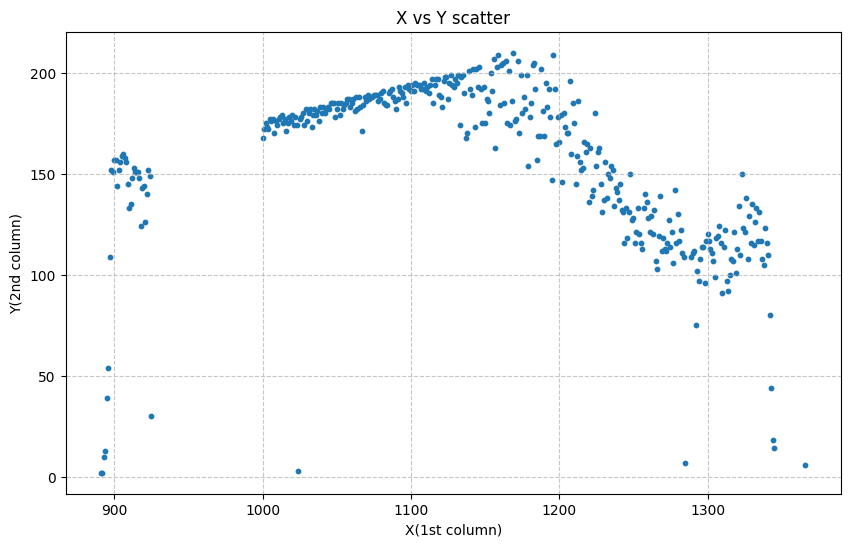

In [3]:
plt.figure(figsize=(10, 6))  # 设置图形大小（可选）

# 绘制散点图（推荐用于观察分布）
plt.scatter(x_values, y_values, s=10)  # s 控制点的大小

# 或者绘制折线图（如果数据有序）
# plt.plot(x_values, y_values)

# 添加标签和标题
plt.xlabel('X(1st column)')
plt.ylabel('Y(2nd column)')
plt.title('X vs Y scatter')

# 显示网格（可选）
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图形
plt.show()

####

### Step2-2

In [ ]:
!python -u s2_prepare_rawsamples-emova_captions_pretrain_300k-8k.py 2>&1 | tee ./logs/s2_proc_emova_captions_pretrain_300k-8k.log